<a href="https://colab.research.google.com/github/JCSR2022/challenge2-data-science-Alura/blob/main/challenge2_data_science_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# challenge2-data-science-Alura

Guia para proyecto en:
https://trello.com/b/GieOySjr/challenge-telecomxlatam


estructura sugerida proyecto:https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb

al final se debe incluir un informe que debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

In [1]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pasos = "challenge2-data-science-Alura\n"

## Extracción de datos

 Los datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

 data opcion1:https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

data opcion2:'https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json'




In [3]:
# Cargar los datos directamente desde la API utilizando Python.
# Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.
# Este metodo se puede mejorar para carga eficiente vía streaming con ijson para datasets grandes

import requests
import json
import pandas as pd

url_data = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
datos_request = requests.get(url_data)

datos_raw = json.loads(datos_request.text)
df = pd.json_normalize(datos_raw)

print(df.shape)
df.sample(5)

(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5664,7739-LAXOG,Yes,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),91.05,2954.5
4897,6695-AMZUF,No,Female,0,Yes,No,70,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),86.45,5950.2
1751,2484-DGXPZ,Yes,Female,0,Yes,Yes,31,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.55,658.95
3199,4468-MLDTH,,Male,0,No,No,4,Yes,No,DSL,...,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,61.30,249.4
979,1374-DMZUI,Yes,Female,1,No,No,4,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.30,424.45


In [4]:
import pandas as pd

#en caso de querer trabajar con un archivo muy grande:
#for chunk in pd.read_json(url, lines=True, chunksize=10000):
#    df = pd.json_normalize(chunk.to_dict("records"))


url_data = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

data_raw = pd.read_json(url_data)

data = pd.json_normalize(data_raw.to_dict(orient="records"))

print(data.shape)
data.head()


(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
extraccion_pasos = """Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.\n"""

In [6]:
pasos+=extraccion_pasos
print(pasos)

challenge2-data-science-Alura
Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.



## Exploracion y comprobación de incoherencias en los datos

Explorar las columnas del dataset y verificar sus tipos de datos.
Consultar el diccionario para comprender mejor el significado de las variables.Identificar las columnas más relevantes para el análisis de evasión.

Verificar si hay problemas en los datos que puedan afectar el análisis: alores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

Diccionario de datos: https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_diccionario.md


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### customerID  debe ser un codigo unico


In [8]:
data['customerID'].unique().shape[0], data.shape[0]

(7267, 7267)

### Churn debe tener solo dos valores

In [9]:
data['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [10]:
print(f"Cantidad de valores no definidos {data[data['Churn']==''].shape[0]}")

Cantidad de valores no definidos 224


In [11]:
# Se eliminaran las filas que no aportan informacion
data = data[data['Churn']!='']
print(data.shape[0])

7043


In [13]:
for col in data.columns:
    if data[col].dtype == 'object':
      print(f"Columna: {col}, valores unicos: {data[col].unique()},{data[col].dtype}")
      print()

Columna: customerID, valores unicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'],object

Columna: Churn, valores unicos: ['No' 'Yes'],object

Columna: customer.gender, valores unicos: ['Female' 'Male'],object

Columna: customer.Partner, valores unicos: ['Yes' 'No'],object

Columna: customer.Dependents, valores unicos: ['Yes' 'No'],object

Columna: phone.PhoneService, valores unicos: ['Yes' 'No'],object

Columna: phone.MultipleLines, valores unicos: ['No' 'Yes' 'No phone service'],object

Columna: internet.InternetService, valores unicos: ['DSL' 'Fiber optic' 'No'],object

Columna: internet.OnlineSecurity, valores unicos: ['No' 'Yes' 'No internet service'],object

Columna: internet.OnlineBackup, valores unicos: ['Yes' 'No' 'No internet service'],object

Columna: internet.DeviceProtection, valores unicos: ['No' 'Yes' 'No internet service'],object

Columna: internet.TechSupport, valores unicos: ['Yes' 'No' 'No internet service'],object

Columna: in

In [14]:
for col in data.columns:
    if data[col].dtype != 'object':
      print(f"Columna: {col}, valores unicos: {data[col].unique()},{data[col].dtype}")
      print()

Columna: customer.SeniorCitizen, valores unicos: [0 1],int64

Columna: customer.tenure, valores unicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0],int64

Columna: account.Charges.Monthly, valores unicos: [65.6  59.9  73.9  ... 91.75 68.8  67.85],float64



In [15]:
# la funcion data['account.Charges.Total'].astype(float) da problemas debido a que hay valores vacios

tmp = pd.to_numeric(data['account.Charges.Total'], errors='coerce')
n_invalid = tmp.isna().sum()
print(f"Filas no convertibles: {n_invalid}")
data[data['account.Charges.Total'].astype(str).str.strip() == ""].head(3)

Filas no convertibles: 11


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [16]:
# Conversion a float de valores validos
data.loc[:,'account.Charges.Total'] = pd.to_numeric(data['account.Charges.Total'],errors='coerce')


In [17]:
#los 11 espacios vacios quedan como valores Nan
data.isna().sum().sum()

np.int64(11)

In [18]:
#eliminacion de las filas con valores nan
data = data.dropna()
data.isna().sum().sum()

np.int64(0)

In [19]:
#por algun motivo la columna no se convirtio al formato float,
# posiblemente el proceso normalize crea el df con columnas tipo contenedor
data.loc[:,'account.Charges.Total'].dtype

dtype('O')

In [20]:
#se procede a forzar recast del dtype

data['account.Charges.Total'] = pd.Series(data['account.Charges.Total'].values, dtype="float64")
data.loc[:,'account.Charges.Total'].dtype

dtype('float64')

In [21]:
#La columna customerID no aporta informacion por lo que se elimina
data.drop(columns=['customerID'],inplace=True)

### Revision outliers

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   object 
 1

In [43]:
numericas = ['customer.tenure','account.Charges.Monthly','account.Charges.Total','account.Charges.daily']
data[numericas].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,account.Charges.daily
count,7032.000000,7032.000000,6808.000000,6808.000000
mean,32.421786,64.798208,2280.403915,76.013464
std,24.545260,30.085974,2265.525050,75.517502
min,1.000000,18.250000,18.800000,0.626667
25%,9.000000,35.587500,399.562500,13.318750
50%,29.000000,70.350000,1394.800000,46.493333
75%,55.000000,89.862500,3805.137500,126.837917
max,72.000000,118.750000,8684.800000,289.493333


In [22]:
exploracion_pasos = """Exploracion:
Se realizo la exploracion de los datos con data.info()
 -se eliminaron filas donde la columna churn no tenia informacion
 -se eliminaron filas que en columna account.Charges.Total no tenian valor y se convirtio a float
 -se eliminaron filas con valores nulos
 -La columna customerID no aporta informacion por lo que se elimina
 -No quedan valores nulos\n"""

In [23]:
pasos += exploracion_pasos
print(pasos)

challenge2-data-science-Alura
Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.
Exploracion:
Se realizo la exploracion de los datos con data.info()
 -se eliminaron filas donde la columna churn no tenia informacion
 -se eliminaron filas que en columna account.Charges.Total no tenian valor y se convirtio a float
 -se eliminaron filas con valores nulos
 -La columna customerID no aporta informacion por lo que se elimina
 -No quedan valores nulos



## Análisis Descriptivo variables numericas

In [41]:
numericas = ['customer.tenure','account.Charges.Monthly','account.Charges.Total','account.Charges.daily']
data[numericas].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,account.Charges.daily
count,7032.000000,7032.000000,6808.000000,6808.000000
mean,32.421786,64.798208,2280.403915,76.013464
std,24.545260,30.085974,2265.525050,75.517502
min,1.000000,18.250000,18.800000,0.626667
25%,9.000000,35.587500,399.562500,13.318750
50%,29.000000,70.350000,1394.800000,46.493333
75%,55.000000,89.862500,3805.137500,126.837917
max,72.000000,118.750000,8684.800000,289.493333


## Analisis de patrones

Por recomendacion de la guia del proyecto se crea al columna 'account.Charges.daily' = 'account.Charges.Monthly'/30

Ahora que se tiene la informacion limpia, se procedera a cumplir los objetivos:

* Analizar patrones asociados al abandono de clientes.

* Detectar variables clave que influyen en la cancelación.



In [24]:
analisis_patrones = "Insights encontrados:\n"

In [25]:
# creacion de columna 'account.Charges.daily'
data['account.Charges.daily'] = data['account.Charges.Total']/30

### Churn total

In [26]:
#Churn_total_porc = data[data['Churn']=='Yes'].shape[0]/data.shape[0]*100

Churn_total_porc = data['Churn'].value_counts(normalize=True).get('Yes', 0)*100

analisis_patrones += f"Procentaje de clientes que presentan Churn: {Churn_total_porc:.2f}%\n"
print(f"Procentaje de clientes que presentan Churn: {Churn_total_porc:.2f}%")

Procentaje de clientes que presentan Churn: 26.58%


### Info cliente

In [28]:
#La estructura de los datos indinca que lo mejor es dividir el analisis por secciones:

cliente = [col  for col in data.columns if col.startswith('customer')]
servicio = [col for col in data.columns if (col.startswith('internet') or col.startswith('phone'))]
cuenta = [col for col in data.columns if col.startswith('account')]

In [29]:
#y por el tipo de datos se separa la revision de 'tenure'
for col in cliente:
    print(col, data[col].unique())

customer.gender ['Female' 'Male']
customer.SeniorCitizen [0 1]
customer.Partner ['Yes' 'No']
customer.Dependents ['Yes' 'No']
customer.tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


#### Genero

In [30]:
#El genero no parece indicar afectacion al Churn
pd.crosstab(data['customer.gender'], data['Churn'], normalize='index') * 100

Churn,No,Yes
customer.gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


#### Edad

In [31]:
print("Que el cliente tenga edad igual o mayor a 65 años si tiene una afectacion")
df_senior = pd.crosstab(data['customer.SeniorCitizen'], data['Churn'], normalize='index') * 100
analisis_patrones += f"Clientes con mas de 65 presentan un porcentaje mayor de Churn: {df_senior.loc[1,"Yes"]:.2f}%\n"
df_senior

Que el cliente tenga edad igual o mayor a 65 años si tiene una afectacion


Churn,No,Yes
customer.SeniorCitizen,,
0,76.349745,23.650255
1,58.318739,41.681261


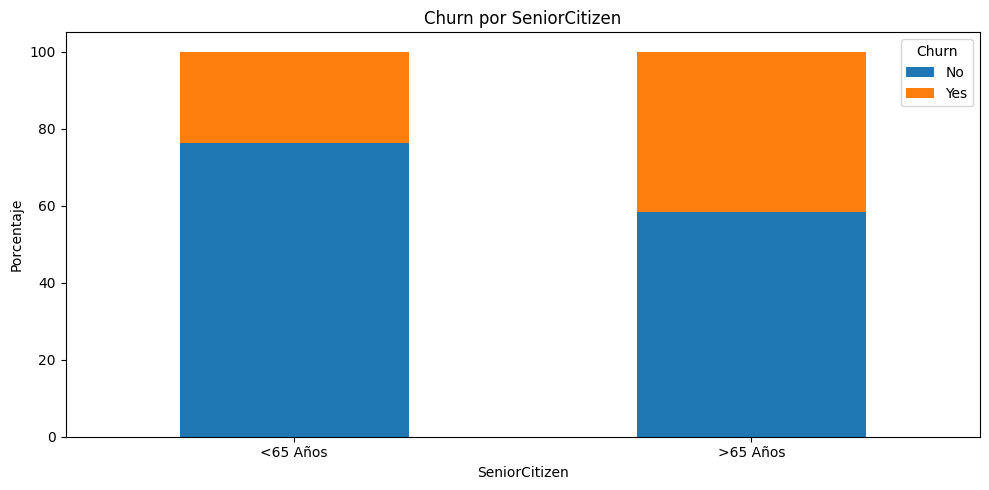

In [32]:
df_senior.index = ['<65 Años','>65 Años']

ax = df_senior.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    title='Churn por SeniorCitizen',
    ylabel='Porcentaje',
    xlabel='SeniorCitizen'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()


#### Pareja

In [33]:
df_Partner = pd.crosstab(data['customer.Partner'], data['Churn'], normalize='index') * 100
print(f"Clientes sin parejas presentan un porcentaje mayor de Churn: {df_Partner.loc["No","Yes"]:.2f}%")
analisis_patrones += f"Clientes sin pareja presentan un porcentaje mayor de Churn: {df_Partner.loc["No","Yes"]:.2f}%\n"
df_Partner

Clientes sin parejas presentan un porcentaje mayor de Churn: 32.98%


Churn,No,Yes
customer.Partner,,
No,67.023908,32.976092
Yes,80.282935,19.717065


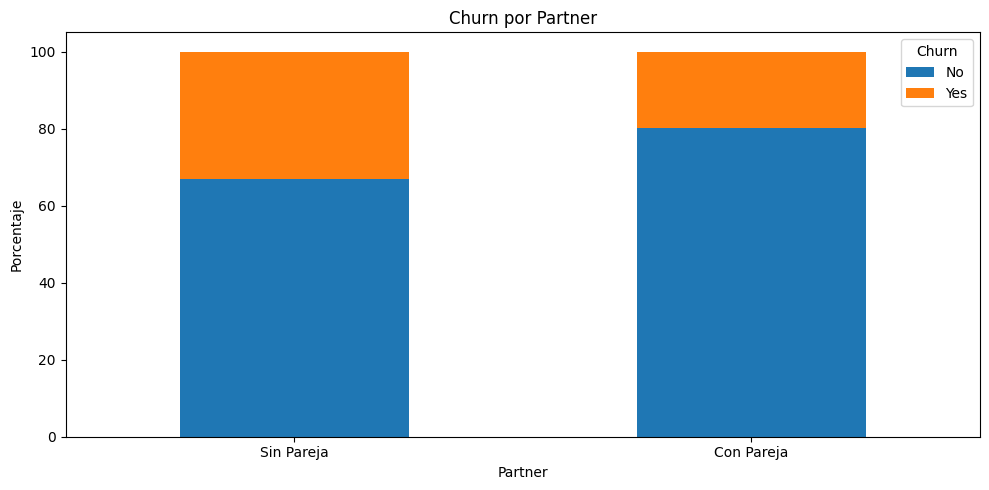

In [34]:
df_Partner.index = ['Sin Pareja','Con Pareja']
ax = df_Partner.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    title='Churn por Partner',
    ylabel='Porcentaje',
    xlabel='Partner'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

#### Dependientes

In [35]:
df_Dependents = pd.crosstab(data['customer.Dependents'], data['Churn'], normalize='index') * 100
print(f"Clientes sin dependientes presentan un porcentaje mayor de Churn: {df_Dependents.loc["No","Yes"]:.2f}%")
analisis_patrones += f"Clientes sin dependientes presentan un porcentaje mayor de Churn: {df_Dependents.loc["No","Yes"]:.2f}%\n"
df_Dependents


Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.28%


Churn,No,Yes
customer.Dependents,,
No,68.720860,31.279140
Yes,84.468795,15.531205


#### Antiguedad

In [36]:
df_tenure = pd.crosstab(data['customer.tenure'], data['Churn'], normalize='index') * 100
df_tenure.drop(columns='No',inplace=True)
df_tenure.rename(columns={'Yes':'Churn'},inplace=True)
df_tenure.head(3), df_tenure.tail(3)

(Churn                Churn
 customer.tenure           
 1                61.990212
 2                51.680672
 3                47.000000,
 Churn               Churn
 customer.tenure          
 70               9.243697
 71               3.529412
 72               1.657459)

El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad


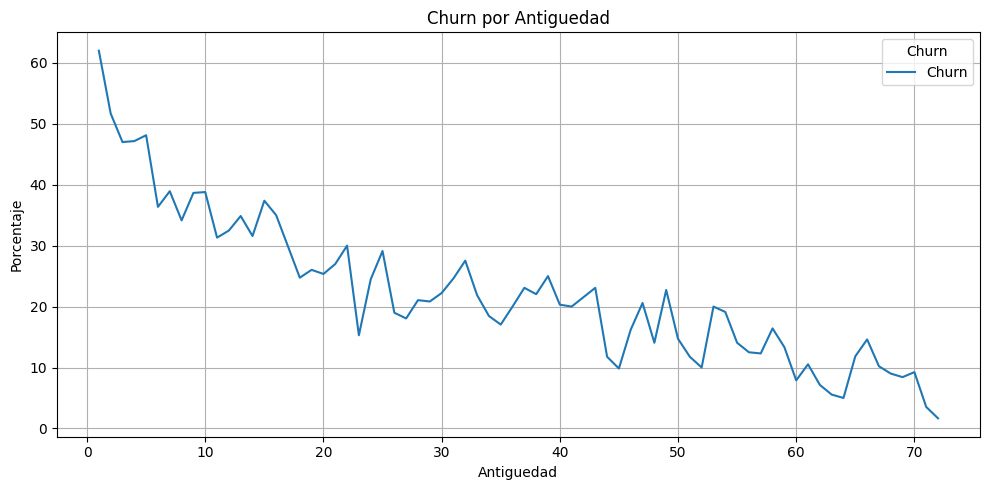

In [37]:
print(f"El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad")
analisis_patrones += "El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad\n"
ax = df_tenure.plot(
    kind='line',
    figsize=(10, 5),
    title='Churn por Antiguedad',
    ylabel='Porcentaje',
    xlabel='Antiguedad',
    grid=True
)
plt.tight_layout()

### Info Servicio

In [38]:
servicio

['phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies']

In [39]:
# df_tenure = data.groupby('customer.tenure').agg({'Churn':'count'})
# df_tenure

#Separamos tenure para analisis diferente

# data[['Churn','customer.tenure']]


# tabla = data.pivot_table(
#     index="customer.tenure",
#     columns="Churn",
#     values="customer.tenure",
#     aggfunc="count"
# )

# tabla.head()


#df_clinete = data.groupby('customer.gender').agg({'Churn':'count'})
# df_clinete = pd.DataFrame()

# for col in cliente:
#   df_clinete[col] = data.groupby('customer.'+col).agg({'Churn':'count'})

# df_clinete


## Generar insights accionables para la toma de decisiones

## Transformacion


Preparar los datos para futuros modelos de Machine Learning.

Para columnas con múltiples categorías sin orden natural, como PaymentMethod, la opción más adecuada es One-Hot Encoding, ya que evita introducir una relación numérica artificial entre las categorías y permite que el modelo las trate de forma independiente, lo cual es especialmente importante en modelos lineales y basados en distancia; aunque aumenta la dimensionalidad, en este caso no suele ser un problema porque el número de categorías es reducido, por lo que resulta una solución más segura y alineada con buenas prácticas que usar una simple codificación numérica.

In [40]:

referencias = {'churn':{0:'No',1:'Yes'}}